<a href="https://colab.research.google.com/github/NadhaIrshad/In22-S5-EN3160---Image-Processing-and-Machine-Vision/blob/main/Assignment_1_on_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

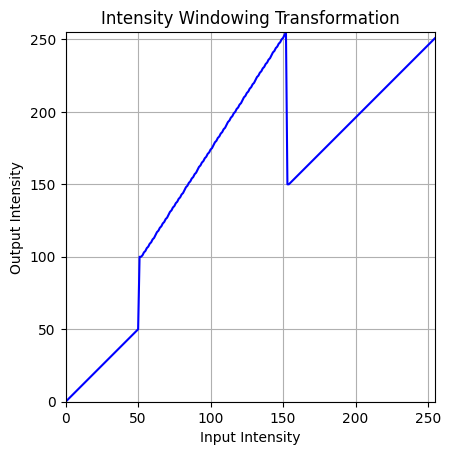

Saving emma.jpg to emma.jpg


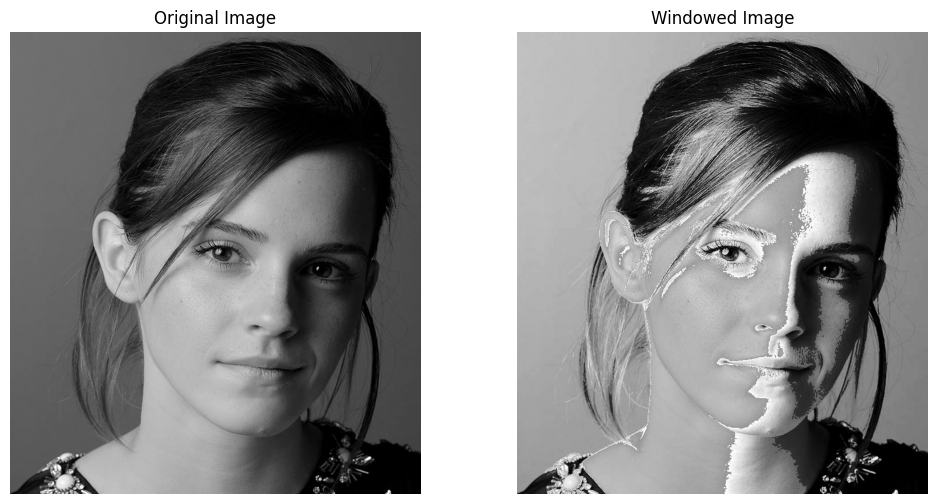

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

points = np.array([
    (0, 0),      # Start - Keep black as black
    (50, 50),    # End of first slope - Mildly bright dark pixels
    (50, 100),   # Vertical jump - make same input suddenly much brighter
    (150, 255),  # Second slope up - Increase midtones to full white
    (150, 150),  # Jump down - same input suddenly dimmer
    (255, 255)   # Final slope - Keep pure white as white
])

# Transformation function
t1 = np.linspace(points[0][1], points[1][1], points[1][0] - points[0][0] + 1).astype(np.uint8)
t_jump1 = np.array([points[2][1]], dtype=np.uint8)
t2 = np.linspace(points[2][1], points[3][1], points[3][0] - points[2][0] + 1).astype(np.uint8)
t_jump2 = np.array([points[4][1]], dtype=np.uint8)
t3 = np.linspace(points[4][1], points[5][1], points[5][0] - points[4][0] + 1).astype(np.uint8)

# Concatenate all segments
transform = np.concatenate((t1, t_jump1, t2, t_jump2, t3))
transform = transform[:256]

# Transformation curve
fig, ax = plt.subplots()
ax.plot(transform, color='blue')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal', 'box')
ax.set_title('Intensity Windowing Transformation')
plt.grid(True)
plt.show()

# Image uploading
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img_orig = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply transformation
img_transformed = cv.LUT(img_orig, transform)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Windowed Image')
ax[1].axis('off')
plt.show()


The implemented intensity windowing transformation was designed to selectively enhance and suppress specific ranges of pixel intensities in the image. The transformation curve contains both gradual slopes and sudden jumps, producing non-linear adjustments to pixel brightness.

From the plotted transformation function, we can observe the following behavior:

Low-intensity preservation – Pixel values from 0 to 50 remain largely unchanged, ensuring that darker areas in the image maintain their visual depth and contrast.

Sudden brightening jump – At intensity 50, pixel brightness is abruptly increased to 100. This amplifies subtle details in darker midtone regions, making them more visible.

Strong midtone enhancement – Between intensities 50 and 150, the curve rises steeply, pushing many midtone pixels toward higher brightness levels, improving contrast in this range.

Sudden dimming jump – At intensity 150, the brightness drops sharply to 150. This helps in controlling overly bright midtones, preventing them from merging into the highlights.

Highlight preservation – Pixel values from 150 to 255 follow a gradual slope to full white, ensuring that bright regions maintain detail without overexposure.

The intensity windowing approach effectively manipulated the grayscale distribution to emphasize relevant features while preserving essential details in both shadows and highlights.


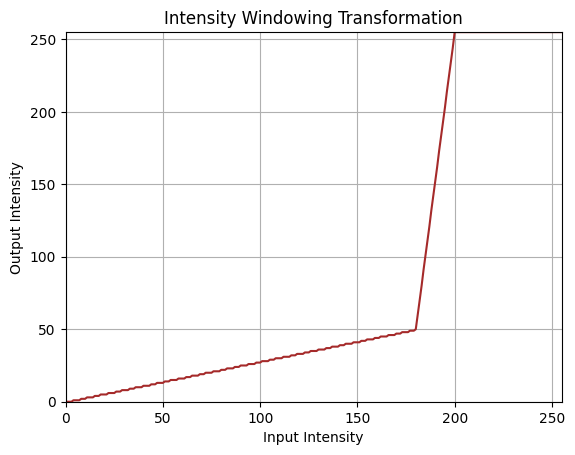

Saving brain_proton_density_slice.png to brain_proton_density_slice.png


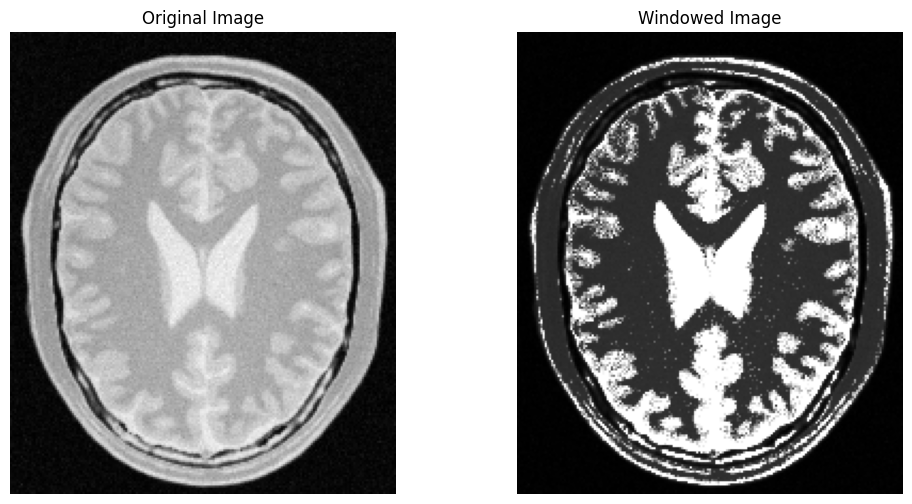

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

points = np.array([
    (0, 0),       # Start
    (180, 50),   # Darken grey pixels
    (200, 255),   # Push higher pixels to white
    (255, 255)    # Keep white as white
])

t1 = np.linspace(points[0][1], points[1][1],
                 points[1][0] - points[0][0] + 1).astype(np.uint8)
t2 = np.linspace(points[1][1], points[2][1],
                 points[2][0] - points[1][0] + 1).astype(np.uint8)
t3 = np.linspace(points[2][1], points[3][1],
                 points[3][0] - points[2][0] + 1).astype(np.uint8)
#t4 = np.linspace(points[3][1], points[4][1],
                 #points[4][0] - points[3][0] + 1).astype(np.uint8)

# Concatenate the segments
transform = np.concatenate((t1, t2[1:], t3[1:]))
transform = transform[:256]

plt.plot(transform, color='blue')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Windowing Transformation')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img_orig = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Windowed Image')
ax[1].axis('off')
plt.show()


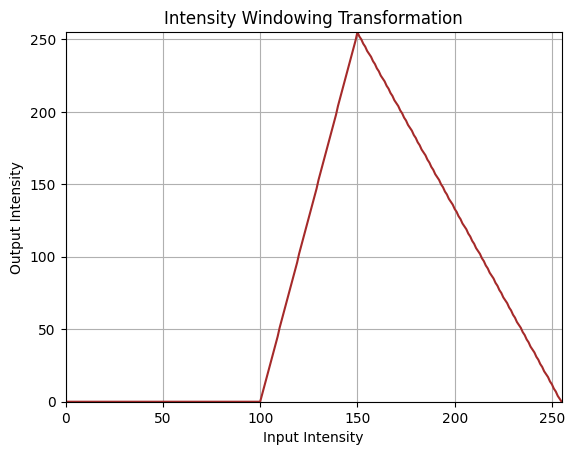

Saving brain_proton_density_slice.png to brain_proton_density_slice (8).png


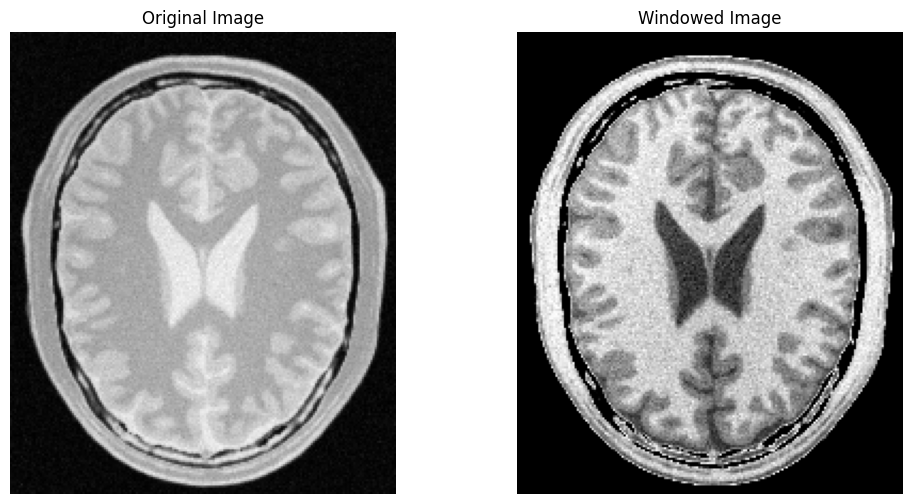

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

points = np.array([
    (0, 0),        # Keep black as black
    (100, 0),      # Darken all below gray matter
    (150, 255),    # Boost gray matter range to white
    (255, 0)       # Darken brighter regions (white matter)
])

t1 = np.linspace(points[0][1], points[1][1],
                 points[1][0] - points[0][0] + 1).astype(np.uint8)
t2 = np.linspace(points[1][1], points[2][1],
                 points[2][0] - points[1][0] + 1).astype(np.uint8)
t3 = np.linspace(points[2][1], points[3][1],
                 points[3][0] - points[2][0] + 1).astype(np.uint8)
#t4 = np.linspace(points[3][1], points[4][1], points[4][0] - points[3][0] + 1).astype(np.uint8)

transform = np.concatenate((t1, t2[1:], t3[1:]))
transform = transform[:256]

plt.plot(transform, color='brown')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Windowing Transformation')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img_orig = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Windowed Image')
ax[1].axis('off')
plt.show()


Saving highlights_and_shadows.jpg to highlights_and_shadows (3).jpg


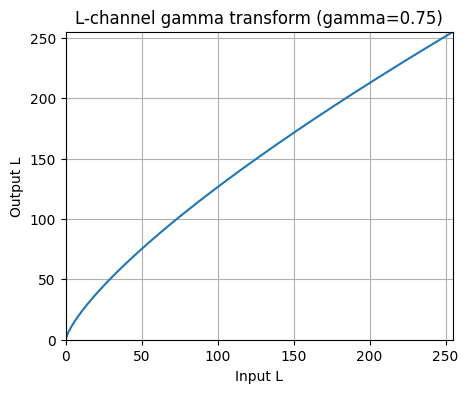

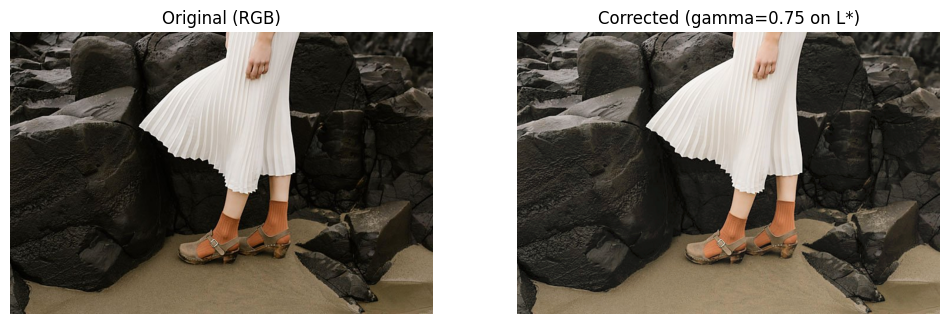

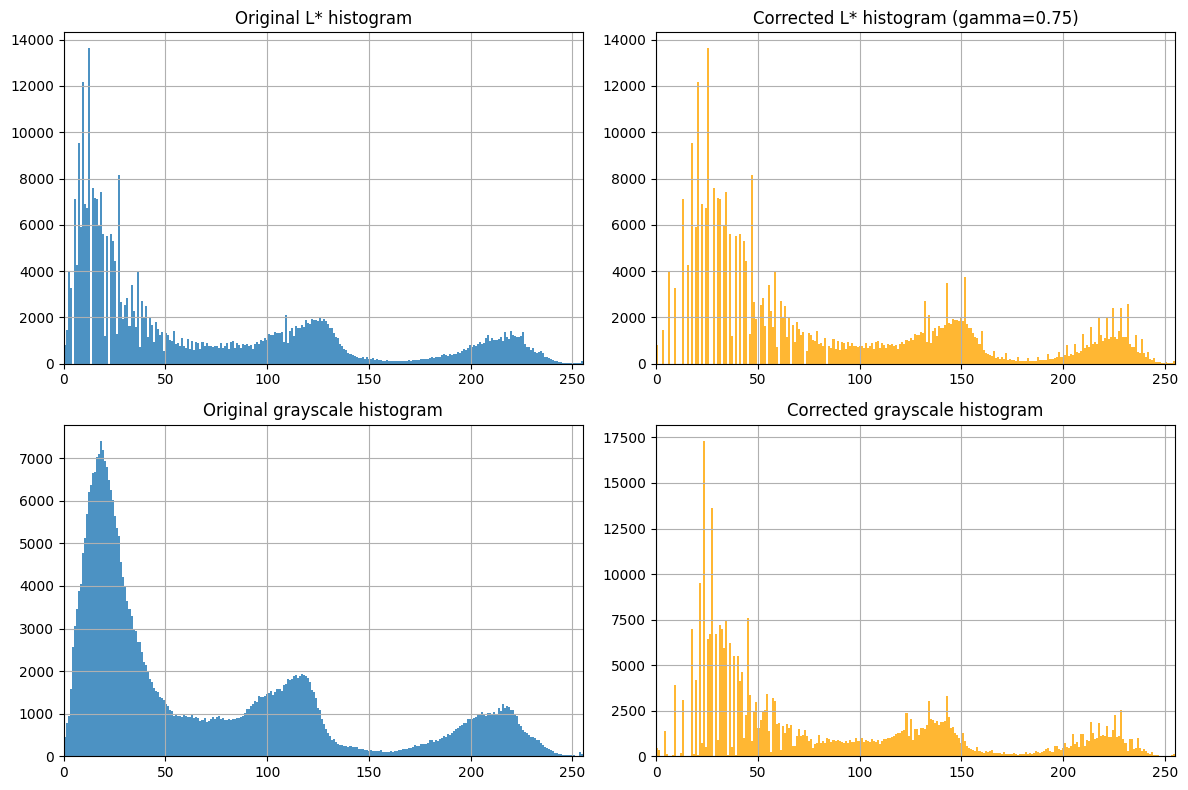

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read image (BGR)
img_bgr = cv.imread(filename)
if img_bgr is None:
    raise FileNotFoundError(f"Could not read '{filename}' - check path or upload the file.")

# Convert to Lab (OpenCV uses 0..255 for each channel)
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_lab)

# Save original L for histogram
L_orig = L.copy()

# --- Gamma correction parameters ---
gamma = 0.75   # chosen gamma value (brightens midtones; gamma < 1 -> brighten)
# normalize L to [0,1], apply gamma, convert back to [0,255]
L_norm = (L.astype(np.float32) / 255.0)
L_gamma = np.clip((L_norm ** gamma) * 255.0, 0, 255).astype(np.uint8)

# Merge corrected L back and convert to BGR
lab_corrected = cv.merge([L_gamma, a, b])
img_bgr_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)

# Also create grayscale versions for full-image histogram comparison
img_gray_orig = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)
img_gray_corr  = cv.cvtColor(img_bgr_corrected, cv.COLOR_BGR2GRAY)

# --- Plot L channel transform curve (optional) ---
inp = np.linspace(0,255,256)
out = ((inp / 255.0) ** gamma) * 255.0
plt.figure(figsize=(5,4))
plt.plot(inp, out)
plt.title(f"L-channel gamma transform (gamma={gamma})")
plt.xlabel("Input L")
plt.ylabel("Output L")
plt.grid(True)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

# --- Display original and corrected images side-by-side ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
plt.title("Original (RGB)")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_bgr_corrected, cv.COLOR_BGR2RGB))
plt.title(f"Corrected (gamma={gamma} on L*)")
plt.axis('off')
plt.show()

# --- Plot histograms ---
fig, axes = plt.subplots(2,2, figsize=(12,8))

# L channel histograms
axes[0,0].hist(L_orig.ravel(), bins=256, range=(0,255), alpha=0.8)
axes[0,0].set_title("Original L* histogram")
axes[0,0].set_xlim(0,255)

axes[0,1].hist(L_gamma.ravel(), bins=256, range=(0,255), alpha=0.8, color='orange')
axes[0,1].set_title(f"Corrected L* histogram (gamma={gamma})")
axes[0,1].set_xlim(0,255)

# Full-image grayscale histograms
axes[1,0].hist(img_gray_orig.ravel(), bins=256, range=(0,255), alpha=0.8)
axes[1,0].set_title("Original grayscale histogram")
axes[1,0].set_xlim(0,255)

axes[1,1].hist(img_gray_corr.ravel(), bins=256, range=(0,255), alpha=0.8, color='orange')
axes[1,1].set_title("Corrected grayscale histogram")
axes[1,1].set_xlim(0,255)

for ax in axes.ravel():
    ax.grid(True)
plt.tight_layout()
plt.show()


In the original L* and grayscale histograms (left side), the pixel intensity distribution is spread across the range but has prominent peaks in the darker and brighter regions, indicating both shadow and highlight areas. After applying gamma correction with γ = 0.75 (right side), the histograms shift towards higher intensity values—this means darker tones have been brightened, while brighter regions are only slightly affected. The L* histogram becomes more concentrated in the mid-to-high range, giving the image an overall lighter appearance without losing too much contrast. This shift is also mirrored in the grayscale histogram, confirming that gamma correction in the L* space effectively adjusts perceived brightness while maintaining color balance in the a* and b* channels. Overall, the transformation enhances visibility in shadowed areas and makes details in dark regions more prominent.

Saving highlights_and_shadows.jpg to highlights_and_shadows (2).jpg


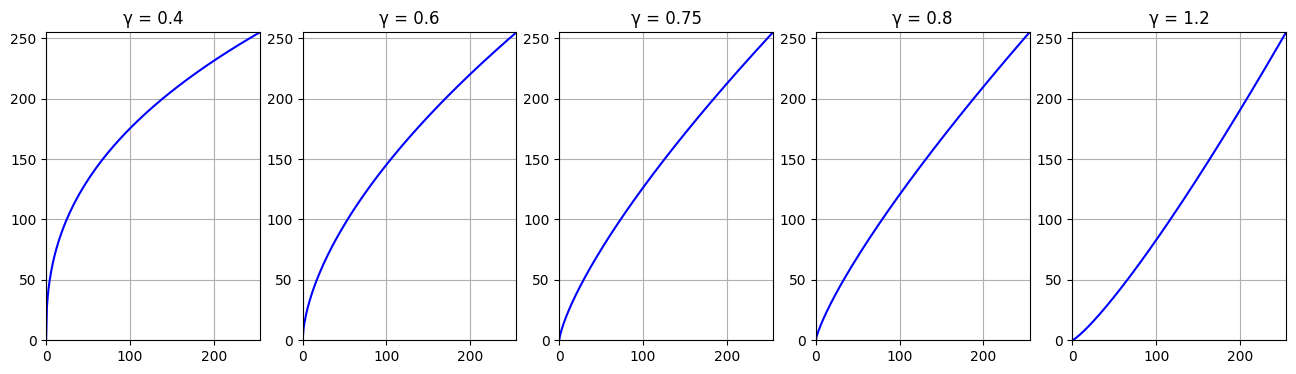

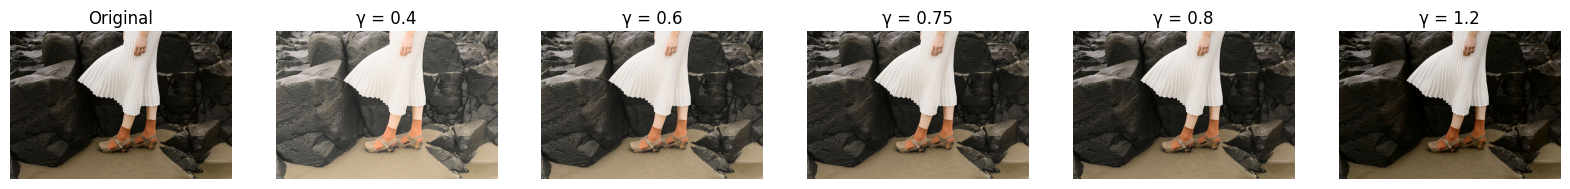

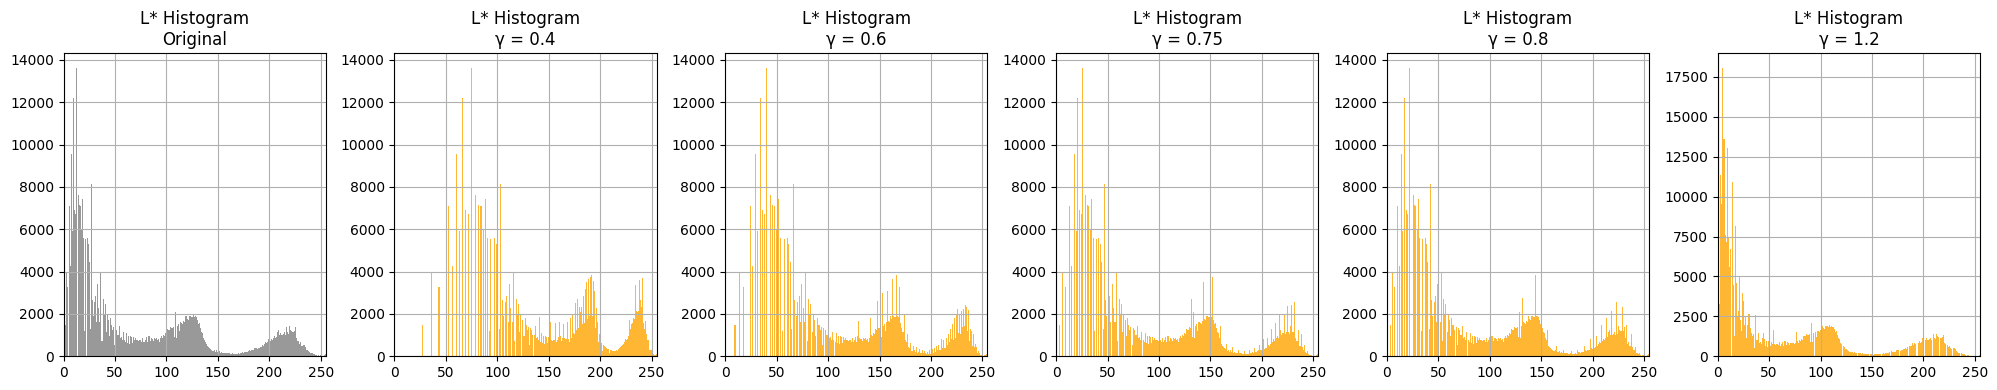

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Upload your image ---
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read image in BGR
img_bgr = cv.imread(filename)
if img_bgr is None:
    raise FileNotFoundError(f"Could not read '{filename}'.")

# Convert to Lab color space
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_lab)
L_orig = L.copy()

# List of gamma values to compare
gamma_values = [0.4, 0.6,0.75, 0.8, 1.2]

# Function to apply gamma correction to L channel
def gamma_correct_L(L_channel, gamma):
    L_norm = L_channel.astype(np.float32) / 255.0
    L_gamma = np.clip((L_norm ** gamma) * 255.0, 0, 255).astype(np.uint8)
    return L_gamma

# Prepare figures
fig_curves, ax_curves = plt.subplots(1, len(gamma_values), figsize=(16, 4))
fig_imgs, ax_imgs = plt.subplots(1, len(gamma_values) + 1, figsize=(20, 6))
fig_hist, ax_hist = plt.subplots(1, len(gamma_values) + 1, figsize=(20, 4))

# Show original image
ax_imgs[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
ax_imgs[0].set_title("Original")
ax_imgs[0].axis('off')

# Plot original L* histogram
ax_hist[0].hist(L_orig.ravel(), bins=256, range=(0,255), color='gray', alpha=0.8)
ax_hist[0].set_title("L* Histogram\nOriginal")
ax_hist[0].set_xlim(0,255)
ax_hist[0].grid(True)

# Loop through gamma values
for i, gamma in enumerate(gamma_values):
    # Apply gamma correction to L channel
    L_gamma = gamma_correct_L(L_orig, gamma)
    lab_gamma = cv.merge([L_gamma, a, b])
    img_bgr_gamma = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)

    # Plot gamma curve
    inp = np.linspace(0,255,256)
    out = ((inp/255.0) ** gamma) * 255.0
    ax_curves[i].plot(inp, out, color='blue')
    ax_curves[i].set_title(f"γ = {gamma}")
    ax_curves[i].set_xlim(0,255)
    ax_curves[i].set_ylim(0,255)
    ax_curves[i].grid(True)

    # Show corrected image
    ax_imgs[i+1].imshow(cv.cvtColor(img_bgr_gamma, cv.COLOR_BGR2RGB))
    ax_imgs[i+1].set_title(f"γ = {gamma}")
    ax_imgs[i+1].axis('off')

    # Plot L* histogram
    ax_hist[i+1].hist(L_gamma.ravel(), bins=256, range=(0,255), alpha=0.8, color='orange')
    ax_hist[i+1].set_title(f"L* Histogram\nγ = {gamma}")
    ax_hist[i+1].set_xlim(0,255)
    ax_hist[i+1].grid(True)

plt.tight_layout()
plt.show()
